## Imports

In [2]:
import plotly.graph_objects as go
import pandas as pd
import numpy as np

## Load csv file

In [3]:
filename = '00863301.CSV'
df = pd.read_csv(filename, skiprows=6, header=0, index_col=0)
df = df.drop([' Resp1', ' Resp2', ' Resp3', ' Swallow1', ' Swallow2', ' Swallow3', ' Marker'], axis=1)
print(df)

                P1   P2   P3   P4   P5   P6   P7   P8   P9   P10  ...   P13  \
Sample number                                                     ...         
2442            13   26   18   80  100   39   10   10   10     9  ...    10   
2443            13   26   18   81  101   38   10   10   10     8  ...     9   
2444            12   26   17   81  101   38   10   10   10     7  ...     8   
2445            12   27   18   81  101   38    9   10    9     8  ...     8   
2446            13   29   18   82  100   38    9   10    9     8  ...     9   
...            ...  ...  ...  ...  ...  ...  ...  ...  ...   ...  ...   ...   
3222            13   26   13   74  107   91   21   21   19    18  ...    19   
3223            13   26   13   74  107   90   22   21   18    17  ...    18   
3224            13   26   13   74  107   90   23   20   18    18  ...    18   
3225            12   26   13   74  108   90   22   20   18    17  ...    18   
3226            12   26   13   75  108   89   21   1

## Create plots

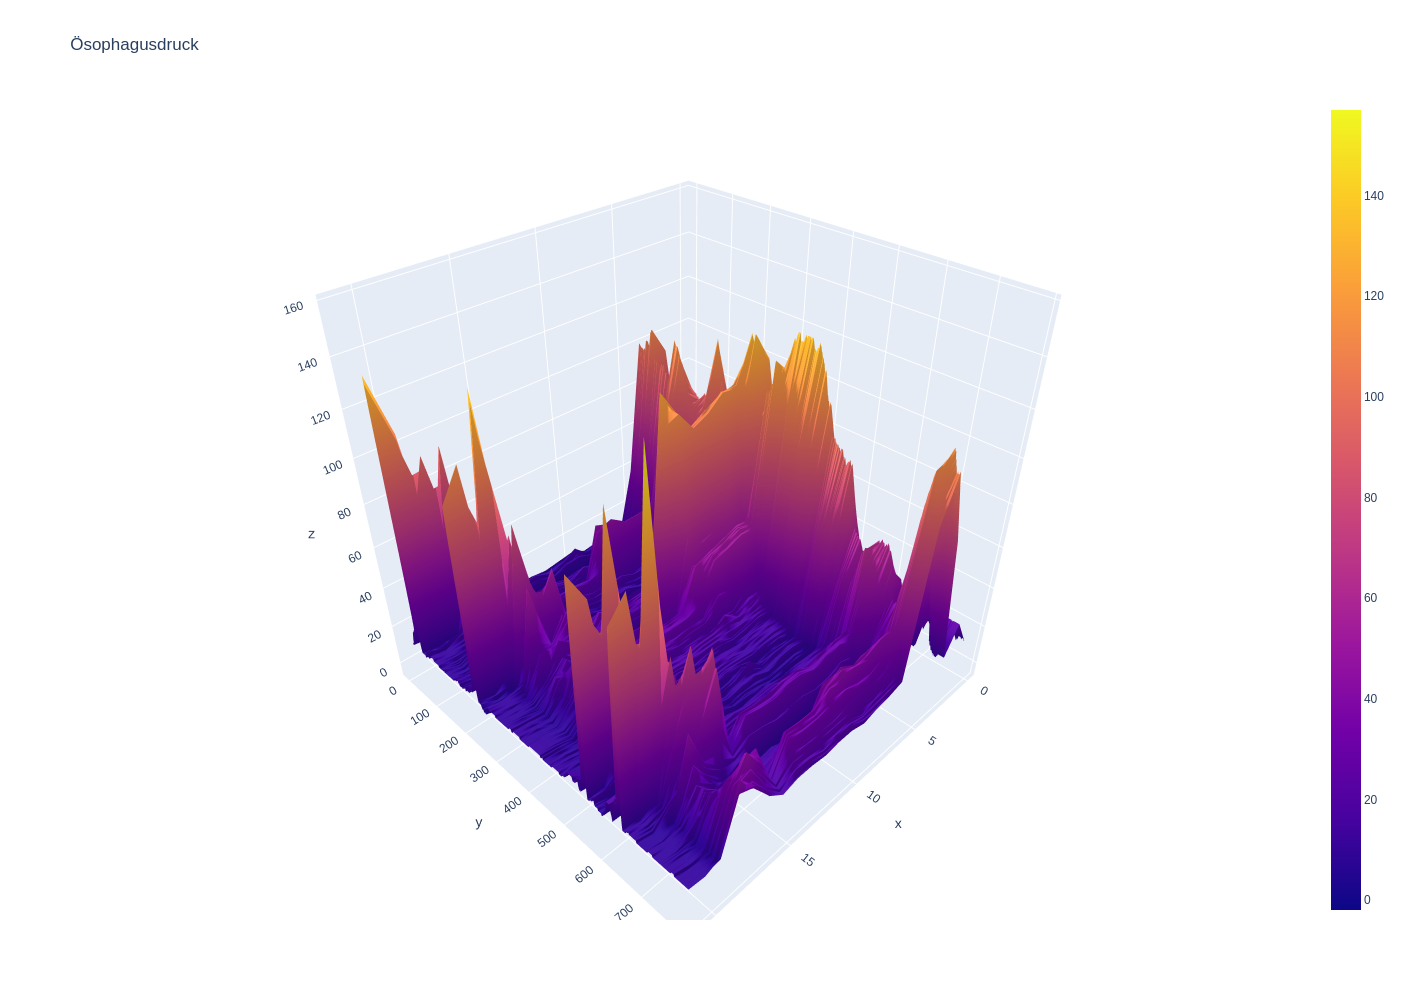

In [4]:
fig = go.Figure(data=[go.Surface(z=df.values)])
fig.update_layout(title='Ösophagusdruck', autosize=False, width=1000, height=1000)
fig.show()

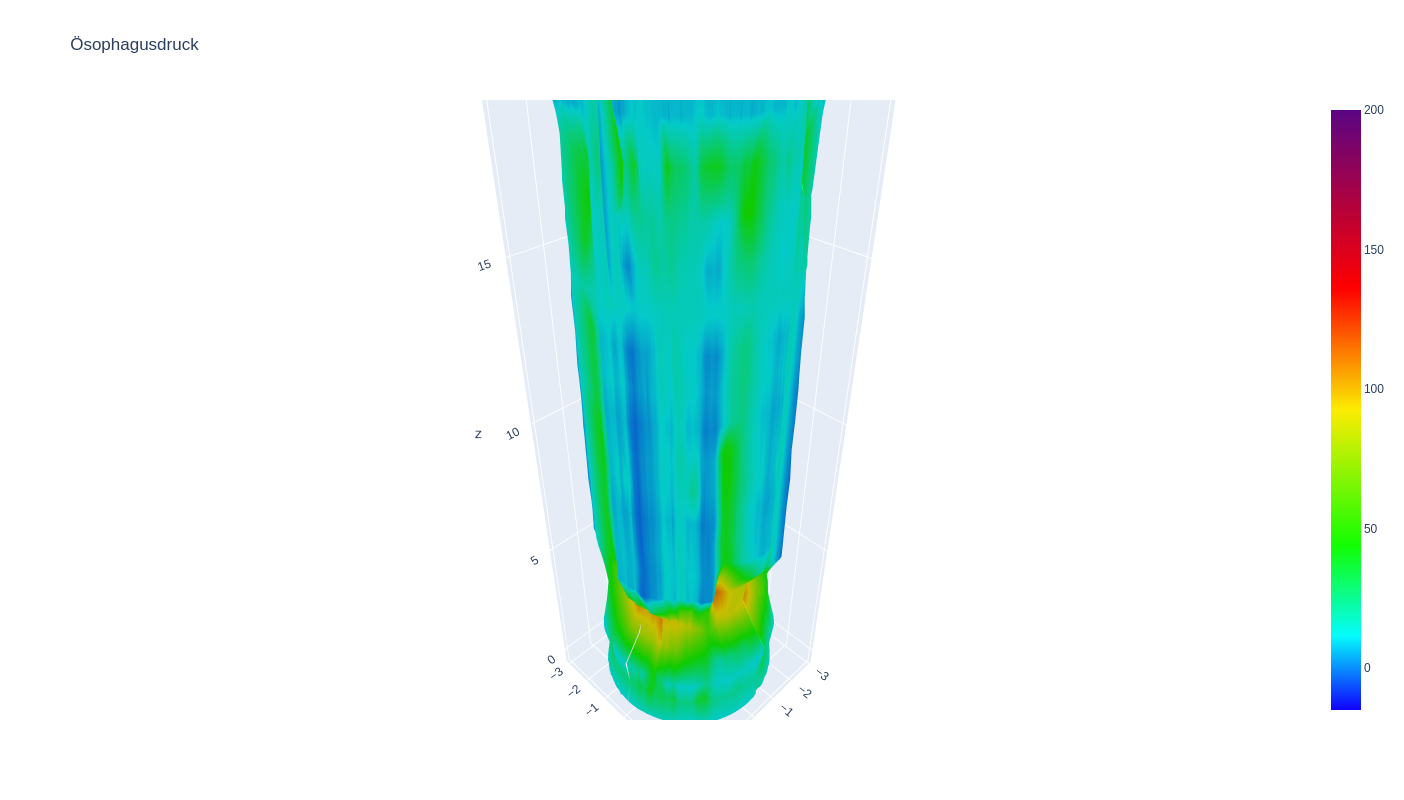

In [30]:
matrix = df.to_numpy()
matrix = matrix.T

radius = 3
height = 21
base = 0

theta = np.linspace(0, 2*np.pi, matrix.shape[1])
v = np.linspace(base, base+height, matrix.shape[0])

theta, v = np.meshgrid(theta, v)
x = (radius-(matrix/100))*np.cos(theta)
y = (radius-(matrix/100))*np.sin(theta)
z = v

# colorscale as in laborie software
colorscale = [[0, "rgb(16, 1, 255)"], 
              [0.123552143573761, "rgb(5, 252, 252)"], 
              [0.274131298065186, "rgb(19, 254, 3)"], 
              [0.5, "rgb(252, 237, 3)"], 
              [0.702702701091766, "rgb(255, 0, 0)"], 
              [1, "rgb(91, 5, 132)"]]

cmin = -15 # min pressure -> 0 in colorscale
cmax = 200 # max pressure -> 1 in colorscale

fig = go.Figure(data=[go.Surface(x=x, y=y, z=z, surfacecolor=matrix, colorscale=colorscale, cmin=cmin, cmax=cmax)])
fig.update_layout(title='Ösophagusdruck', width=800, height=800)
fig.show()